### Import the structure and settings

In [1]:
from f3ast import *

file_path = "FunktyBall.stl"

settings = load_settings()
struct = Structure.from_file(file_path, **settings["structure"])
# scale the structure 3x
struct.rescale(3)
struct.show()


### Define the model and solve for dwells

In [2]:
gr = 0.15
k = 1
sigma = 4.4
%time model = DDModel(struct, gr, k, sigma, **settings['dd_model'])
#%time model = RRLModel(struct, gr, sigma)

%time stream_builder, dwell_solver = StreamBuilder.from_model(model, **settings['stream_builder'])
dwell_solver.print_total_time()

Slicing...
Sliced
CPU times: user 3.31 s, sys: 109 ms, total: 3.42 s
Wall time: 1.36 s
Solving for dwells...
Solved
CPU times: user 107 ms, sys: 50.3 ms, total: 158 ms
Wall time: 2.28 s
Total stream time:  0:00:38.418469


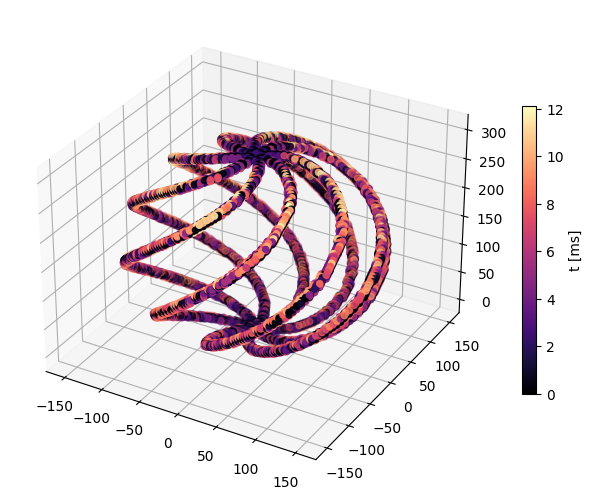

In [3]:
ax, sc = dwell_solver.show_solution()


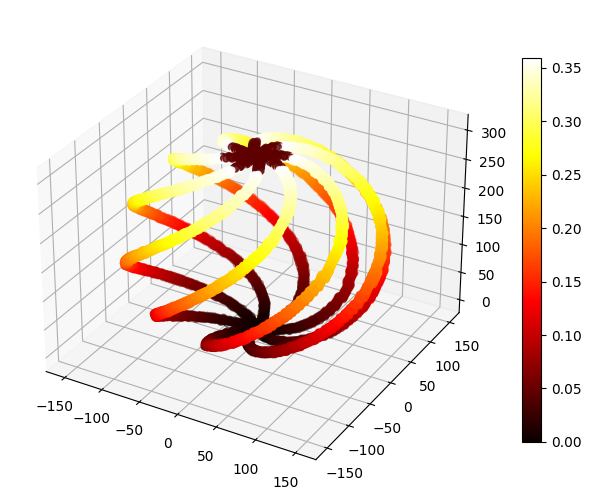

In [4]:
resistance = model.resistance
ax, sc = struct.plot_slices(c=np.concatenate(resistance), cmap="hot")
plt.colorbar(sc, shrink=0.8)


### Save the stream

In [5]:
save_path = "stream_test"

strm = stream_builder.get_stream()
strm.write(save_path)
save_build(save_path, dwell_solver, stream_builder)


#### Load the stream

In [6]:
load_path = "stream_test.pickle"
strm.from_file("stream_test.str")
dwell_solver, stream_builder = load_build(load_path)
